# Función de densidad de probabilidad
vs función de masa de probabilidad

## Notación

$f_x(x)$

# Distribución uniforme

$\huge f_x(x) = \frac{1}{B-A}$  si A<x<B

In [2]:
from matplotlib import pyplot as plt
import numpy as np

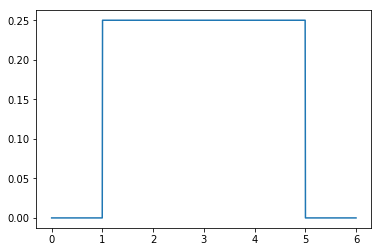

In [16]:
A = 1
B = 5
x = np.linspace(A-1, B+1, 1000)
y = ((x>A) & (x<B)) / (B-A)
plt.plot(x, y)
plt.show()

- El area debajo de la curva es 1
- Es densidad por lo que son siempre probabilidades en un intervalo que se calcula como el area de ese intervalo
- $\mu_x=\frac{A+B}{2}$
- $\sigma_x =\frac{(B-A)^2}{12}$

# Como generamos?

In [15]:
np.random.uniform(A, B, 100)

array([4.54426821, 4.77155433, 2.59876346, 4.84279668, 1.31902574,
       1.63412682, 3.58751543, 2.795288  , 2.97516451, 1.67641033,
       3.41561921, 1.74993185, 2.11570284, 2.17756759, 2.70901178,
       4.83172745, 4.79720666, 2.54184185, 4.65727905, 2.03251707,
       2.13181389, 3.70936691, 4.35631915, 3.25573335, 1.68403423,
       3.80931593, 4.40088575, 2.48173343, 1.13469174, 2.08029876,
       3.78555995, 1.70906447, 3.23589785, 2.54879105, 1.88952386,
       3.36782787, 2.2592215 , 2.17640918, 4.74078321, 2.59281612,
       4.20187731, 4.5277243 , 2.72105432, 2.85817599, 2.91032192,
       4.844547  , 2.04077895, 1.72814956, 1.01875805, 2.06377214,
       4.28153297, 2.06389837, 2.06111055, 3.18140149, 3.26178932,
       2.0993204 , 2.45552805, 2.73702758, 1.47360113, 2.02503341,
       3.04582075, 3.01848734, 1.31278733, 2.21377764, 1.38601677,
       4.13400746, 2.50400866, 2.83637397, 4.71663617, 3.93882341,
       4.42155367, 1.54809351, 4.45939928, 2.98648964, 2.82901

# Distribución Gaussiana

$\huge f_x(x) = \frac{1}{\sqrt{2\pi\sigma_x^2}}e^{-\frac{(x-\mu_x)^2}{2\sigma_x^2}}$ 

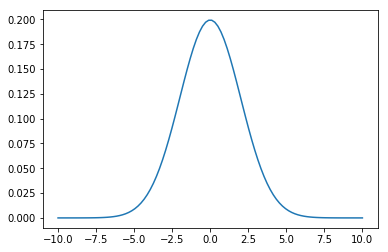

In [26]:
from scipy.stats import norm
rango = np.linspace(-10, 10, 100)
media = 0
std = 2
pdf = norm.pdf(rango, media, std)
plt.plot(rango, pdf)
plt.show()

In [51]:
import pandas as pd
df = pd.read_csv('alturas-pesos-1-train.csv')

Cambiar media y std

In [52]:
from collections import Counter
pesos = df['Peso'].values
peso_H =  df[df['Genero'] == 'Hombre']['Peso'].values

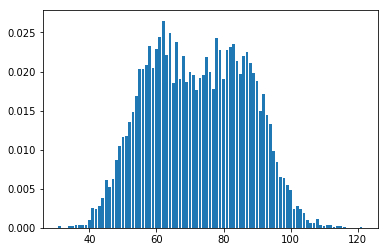

In [53]:
pesos_frecuencia = dict(Counter(pesos))
peso_prob = {pe:c/len(pesos) for pe, c in pesos_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

Es gaussiana?

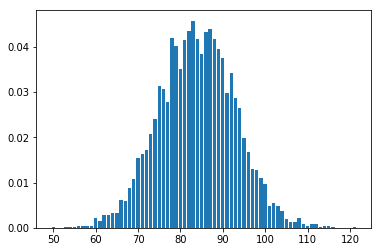

In [54]:
peso_H_frecuencia = dict(Counter(peso_H))
peso_prob_H = {pe:c/len(peso_H) for pe, c in peso_H_frecuencia.items()}
plt.bar(peso_prob_H.keys(), peso_prob_H.values())
plt.show()

In [55]:
mean = peso_H.mean()
std = peso_H.std()

### La distribución Gaussiana queda determinada por solo dos parámetros:
Media y Varianza

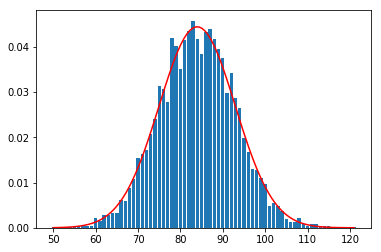

In [56]:
rango = np.linspace(peso_H.min(), peso_H.max(), 100)
pdf = norm.pdf(rango, mean, std)
plt.plot(rango, pdf, c='r')
plt.bar(peso_prob_H.keys(), peso_prob_H.values())
plt.show()

# Como generamos?

In [57]:
np.random.normal(mean, std, 100)

array([ 89.71309872,  74.69891289,  96.76847422, 100.61516446,
        91.63245587,  81.63520481,  89.6398101 ,  71.1076217 ,
        92.92242431, 107.31558923,  87.76106636,  95.12649212,
        84.51297347,  83.88228705,  90.28123034,  70.76641064,
        90.11115305,  62.46042091,  82.99002624,  84.48528744,
        95.32399765,  89.67690365,  76.62737561,  85.69481821,
        93.38933808, 101.32902004,  81.78736498,  93.02222373,
        81.97809724,  81.70845212,  86.43044211,  65.84260286,
        90.41747593,  84.48263593,  91.34047633,  88.49462872,
        87.09421818,  71.02232119,  98.79426727,  79.00710035,
        80.21390486,  88.14074734,  70.66304363,  80.55794821,
        87.94601658,  85.84192512,  87.52839012,  88.59838364,
        67.82905904,  77.90703679,  73.89907844,  85.92337192,
        81.78751898,  82.32193932,  77.0249574 ,  75.81438191,
        97.60968915,  87.17206158, 116.31081359,  82.83108635,
        77.86434737,  95.62072012,  82.28172647,  76.95

# Teorema del limite central

Dadas $X_1$, $X_2$, $X_3$ ... $X_N$ todas V.As. i.i.d. (Intependientes e Identicamente Distribuidas)

Donde la media $E[X_i] = \mu_{x_i}$

Y la varianza $E[(X_i-\mu_{x_i})^2] = \sigma^2_{x_i} < \infty$

$S = \sum_i^N{\frac{X_i}{N}}$

La V.A S tiene distribución gaussiana con media $\mu_{x_i}$ y varianza $\sigma^2_{x_i}$ cuando N tiende a infinito